# COGS 108 Final Project

Team Members: Thalal Cassim, Kevin Chen, Yongji Shen, Ansuman Somasundaram, Wei Zeng

## Grading Rubric For Ur Reference
https://github.com/COGS108/Projects/blob/master/FinalProj_Checklist.pdf

# Introduction and Background

# Data Description

# Data Cleaning & Pre-processing

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read from data set
suicide = pd.read_csv("./datasets/suicide-rates-overview-1985-to-2016.csv")

In [3]:
#select data from those following countries from our data set
selected = ["Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa"]
tmp = list()   
for i in (suicide.index):
    for country in selected:
        if suicide.loc[i,"country"]==country:
            tmp.append(suicide.loc[i].tolist())
df = pd.DataFrame(columns = suicide.columns)
for i in tmp:
    df = df.append(pd.Series(i, index=suicide.columns), ignore_index=True)

In [4]:
#suicide.isnull().any()
suicideHDI = suicide.dropna()

dfHDI = df.dropna()

In [5]:
#sex,age,dgc,and hdi for all countries
suicide_sex = suicide[['country','year','sex','suicides_no','population']]
suicide_age = suicide[['country','year','age','suicides_no','population']]
suicide_gdp = suicide[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
suicide_hdi = suicideHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [6]:
#sex,age,dgc,and hdi for selected countries 
#("Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa")
df_sex = df[['country','year','age','sex','suicides_no','population']]
df_age = df[['country','year','age','suicides_no','population']]
df_gdp = df[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
df_hdi = dfHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [27]:
year = df_sex['year'].unique()
#print(year)
count_male = 0
conut_female = 0
#df_sex
for i in range(len(df_sex)):
    if df_sex.loc[i,"country"] == 'Argentina':
        if df_sex.loc[i,"sex"] == "male":
            count_male += df_sex.loc[i,"suicides_no"]
        else:
            conut_female += df_sex.loc[i,"suicides_no"]

# Data Visualization

## Seaborn Config

In [8]:
# Configure Seaborn
sns.set()
sns.set_context('talk')

# Set max number of displayed rows/columns
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Sex vs Suicide Rate

          country  female   male
0       Argentina     604   2469
1       Australia     735   2292
2    South Africa     105    377
3        Thailand     839   3366
4  United Kingdom    1178   3732
5   United States   10199  33990


Text(0.5, 1.0, 'Sex vs Suicide Rate (2015)')

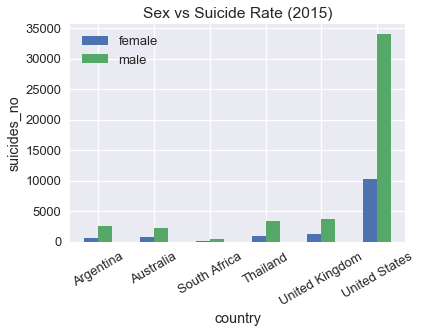

In [28]:
# Trying to look for the Sex vs Suicide Rate in 2015
df_sex_2015 = df_sex[df_sex['year'] == 2015]
male = df_sex_2015[df_sex_2015['sex'] == 'male']
female = df_sex_2015[df_sex_2015['sex'] == 'female']
tmp = list()
male_country = dict()
female_country = dict()
for i in (male.index):
    for country in selected:
        if male.loc[i,"country"]==country:
            if country in male_country:
                male_country[country] += male.loc[i,'suicides_no']
            else:
                male_country[country] = male.loc[i,'suicides_no']
for i in (female.index):
    for country in selected:
        if female.loc[i,"country"]==country:
            if country in female_country:
                female_country[country] += female.loc[i,'suicides_no']
            else:
                female_country[country] = female.loc[i,'suicides_no']
country = list()
male_count=list()
female_count = list()
for i in male_country:
    country.append(i)
    male_count.append(male_country[i])
    female_count.append(female_country[i])
d = {'country':country,'male': male_count, 'female': female_count}
sex = pd.DataFrame(data = d)
print(sex)
sex.plot.bar(x = 'country', rot=30)
plt.ylabel('suicides_no')
plt.title('Sex vs Suicide Rate (2015)')

## Sex + Age vs Suicide Rates

(0, 700)

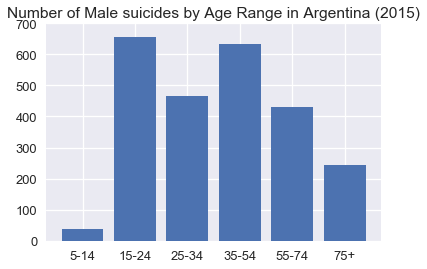

In [18]:
# Sex+Age vs Suicide Rates
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)

df_sex_2015 = df_sex[df_sex['year'] == 2015]
df_sex_argentina = df_sex_2015[df_sex_2015['country'] == 'Argentina']

count_male_a = 0
count_male_b = 0
count_male_c = 0
count_male_d = 0
count_male_e = 0
count_male_f = 0

#df_sex
df_male_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'male']

for index, row in df_male_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_male_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_male_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_male_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_male_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_male_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_male_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_male_a, "count 15-24:", count_male_b, "count 25-34:", count_male_c, "count 35-54:", count_male_d, "count 55_74:", count_male_e, "count 75+:", count_male_f)

count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_male_a, count_male_b, count_male_c, count_male_d, count_male_e, count_male_f]} 
counts = pd.DataFrame(count_dict)
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of Male suicides by Age Range in Argentina (2015)")
plt.ylim(0, 700)

(0, 700)

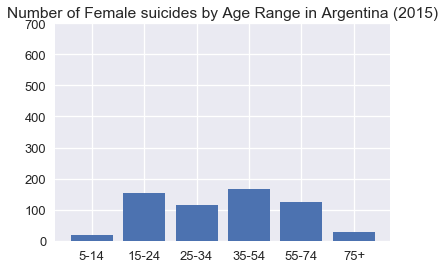

In [19]:
count_female_a = 0
count_female_b = 0
count_female_c = 0
count_female_d = 0
count_female_e = 0
count_female_f = 0

#df_sex
df_female_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'female']

for index, row in df_female_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_female_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_female_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_female_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_female_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_female_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_female_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_female_a, "count 15-24:", count_female_b, "count 25-34:", count_female_c, "count 35-54:", count_female_d, "count 55_74:", count_female_e, "count 75+:", count_female_f)

count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_female_a, count_female_b, count_female_c, count_female_d, count_female_e, count_female_f]} 
counts = pd.DataFrame(count_dict)
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of Female suicides by Age Range in Argentina (2015)")
plt.ylim(0, 700)

## GDP vs Suicide Rate

                       gdp  ratio
country                          
Antigua and Barbuda   9.14     15
Argentina            11.77    112
Armenia              10.02     45
...                    ...    ...
United Kingdom       12.46     86
United States        13.26    175
Uruguay              10.73    270

[62 rows x 2 columns]


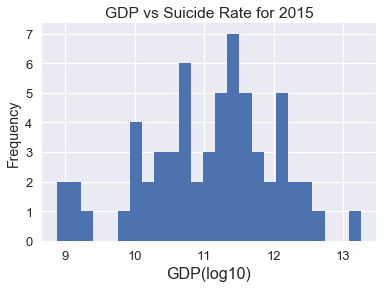

In [20]:
# Trying to look for  the GDP vs Suicide Rate for 2015
suicide_gdp = suicide_gdp[suicide_gdp.year == 2015]
tmp1 = suicide_gdp['country'].unique()
result1 = dict()
for i in tmp1:
    result1[i] = 0
result2 = dict()
for i in tmp1:
    result2[i] = 0
for i in suicide_gdp.index:
    country = suicide_gdp.loc[i,"country"]
    ratio = suicide_gdp.loc[i,'suicides/100k pop']
    gdp = suicide_gdp.loc[i,' gdp_for_year ($) ']
    result1[country]+= ratio
    result2[country] = gdp
country=list()
ratiolist = list()
gdplist = list()
import math
for i in tmp1:
    ratio = result1[i]
    gdp = result2[i]
    country.append(i)
    ratiolist.append(int(ratio))
    gdp = gdp.replace(',','')
    gdplist.append(math.log10(int(gdp)))
data= dict()
data = {"country":country,"ratio":ratiolist,"gdp":gdplist}

df1 = pd.DataFrame(data)
df1=df1.set_index("country")
print(df1)
df1['gdp'].plot('hist', bins = 25)
plt.xlabel('GDP(log10)', fontsize=16)
plt.title('GDP vs Suicide Rate for 2015')
f2 = plt.gcf()

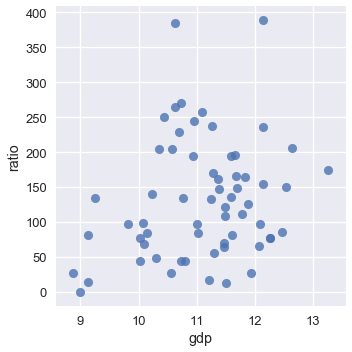

In [26]:
sns.lmplot(x='gdp', y='ratio', data=df1,fit_reg=False);

                country   hdi  ratio
0   Antigua and Barbuda -0.11      0
1             Argentina -0.08    111
2               Armenia -0.13     37
..                  ...   ...    ...
72        United States -0.04    171
73              Uruguay -0.10    248
74           Uzbekistan -0.17     85

[75 rows x 3 columns]


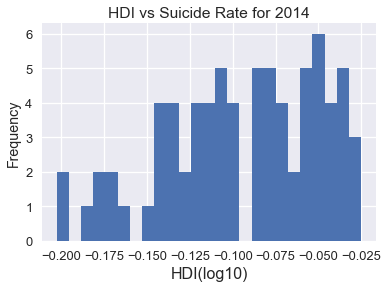

In [22]:
#HDI vs Suicide Rate for 2014
suicide_hdi = suicide_hdi[suicide_hdi.year == 2014]
tmp1 = suicide_hdi['country'].unique()
result3 = dict()
for i in tmp1:
    result3[i] = 0

result4 = dict()
for i in tmp1:
    result4[i] = 0

for i in suicide_hdi.index:
    country = suicide_hdi.loc[i,"country"]
    ratio = suicide_hdi.loc[i,'suicides/100k pop']
    hdi = suicide_hdi.loc[i,'HDI for year']
    result3[country]+= ratio
    result4[country] = hdi
country=list()
ratiolist2 = list()
hdilist = list()
import math
for i in tmp1:
    ratio = result3[i]
    hdi = result4[i]
    country.append(i)
    ratiolist2.append(int(ratio))
    hdilist.append(math.log10(float(hdi)))
data= dict()
data = {"country":country,"ratio":ratiolist2,"hdi":hdilist}
df2 = pd.DataFrame(data)
print (df2)
df2=df2.set_index("country")
df2['hdi'].plot('hist', bins = 25)
plt.xlabel('HDI(log10)', fontsize=16)
plt.title('HDI vs Suicide Rate for 2014')
f3 = plt.gcf()

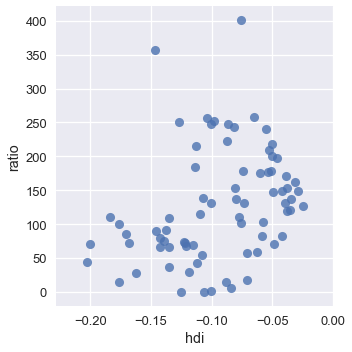

In [23]:
%matplotlib inline
sns.lmplot(x='hdi', y='ratio', data=df2,fit_reg=False);

# Data Analysis & Results

## OLS Regression Model For GDP vs Suicide Rate per 100K aka Ratio

In [24]:
import patsy
import statsmodels.api as sm
outcome_1, predictors_1 = patsy.dmatrices('ratio ~ gdp', df1)
mod_1 = sm.OLS(outcome_1, predictors_1)
type(mod_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.173
Date:                Mon, 03 Jun 2019   Prob (F-statistic):             0.0799
Time:                        16:20:28   Log-Likelihood:                -361.65
No. Observations:                  62   AIC:                             727.3
Df Residuals:                      60   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -90.4529    125.705     -0.720      0.4

/Users/yongjishen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## OLS Regression Model For HDI vs Suicide Rate per 100K aka Ratio

In [25]:
outcome_2, predictors_2 = patsy.dmatrices('ratio ~ hdi', df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
type(mod_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     7.801
Date:                Mon, 03 Jun 2019   Prob (F-statistic):            0.00666
Time:                        16:20:28   Log-Likelihood:                -433.64
No. Observations:                  75   AIC:                             871.3
Df Residuals:                      73   BIC:                             875.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.4883     21.460      8.457      0.0

# Privacy & Ethnic Considerations

# Conclusion & Discussion